#Transfer Learning 

Very Close to Working hopefully!

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install tensorflow_hub
import tensorflow_hub as hub

import itertools

tf.random.set_seed(1)


Loading the Data

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train[:10000]

In [4]:
IMAGE_SHAPE = (224,224)

In [5]:
X_train.shape[0]

10000

Reshaping the data so it is easier to work with

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

In [10]:
a
#X_train_resized = np.zeros(shape=(60000, 224, 224, 3)) 

NameError: name 'a' is not defined

In [7]:

X_train_img = tf.image.resize(X_train, IMAGE_SHAPE)
X_train_img = tf.image.grayscale_to_rgb(X_train_img)
#X_train_resized[] = X_train_img

In [8]:
X_train_img.shape

TensorShape([10000, 224, 224, 3])

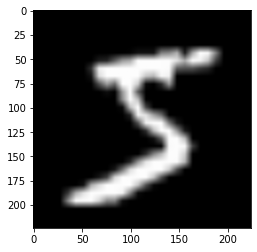

In [9]:
plt.imshow(X_train_img[0])

In [12]:
y_train = y_train[:10000]
y_train.shape

(10000,)

In [14]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(10, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

m.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = m.fit(X_train_img,y_train, epochs=10, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 563s 3s/step - loss: 0.6585 - accuracy: 0.8353 - val_loss: 0.3615 - val_accuracy: 0.9137
Epoch 2/10
219/219 [==============================] - 3268s 15s/step - loss: 0.2473 - accuracy: 0.9409 - val_loss: 0.2486 - val_accuracy: 0.9343
Epoch 3/10
219/219 [==============================] - 569s 3s/step - loss: 0.1733 - accuracy: 0.9603 - val_loss: 0.2140 - val_accuracy: 0.9463
Epoch 4/10
219/219 [==============================] - 569s 3s/step - loss: 0.1344 - accuracy: 0.9721 - val_loss: 0.1882 - val_accuracy: 0.9483
Epoch 5/10
219/219 [==============================] - 566s 3s/step - loss: 0.1108 - accuracy: 0.9764 - val_loss: 0.1738 - val_accuracy: 0.9523
Epoch 6/10
219/219 [==============================] - 564s 3s/step - loss: 0.0922 - accuracy: 0.9809 - val_loss: 0.1574 - val_accuracy: 0.9580
Epoch 7/10
219/219 [==============================] - 564s 3s/step - loss: 0.0782 - accuracy: 0.9843 - val_loss: 0.1567 - val_accuracy: 0.95

KeyboardInterrupt: 

In [ ]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [ ]:
plot_history(history, 10)